<a href="https://colab.research.google.com/github/YousefTamer911/Backpropagation-Assignment/blob/main/Assignment%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: Fine-tuning VGG16 for Flower Classification**


### **1. Import Libraries and Download Data**


In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

(dataset_train, dataset_val), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

num_classes = dataset_info.features['label'].num_classes
print(f"Number of classes: {num_classes}")
print(f"Class names: {dataset_info.features['label'].names}")

Number of classes: 5
Class names: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


### **2. Image Preprocessing**


In [6]:
IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image, label

train_data = dataset_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(1)
val_data = dataset_val.map(preprocess).batch(BATCH_SIZE).prefetch(1)

### **3. Build Model (Feature Extraction)**


In [7]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,301 (56.64 MB)

 Trainable params: 132,613 (518.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

### **4. Train the Model**


In [8]:
EPOCHS = 10
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 266ms/step - accuracy: 0.2564 - loss: 6.7907 - val_accuracy: 0.6322 - val_loss: 1.3568
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step - accuracy: 0.5124 - loss: 2.8416 - val_accuracy: 0.7411 - val_loss: 0.8641
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.6144 - loss: 1.9255 - val_accuracy: 0.7902 - val_loss: 0.7126
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - accuracy: 0.6894 - loss: 1.3653 - val_accuracy: 0.8161 - val_loss: 0.6255
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.7423 - loss: 1.1732 - val_accuracy: 0.8270 - val_loss: 0.5837
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.7551 - loss: 1.0649 - val_accuracy: 0.8324 - val_loss: 0.5409
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.7621 - loss: 0.9257 - val_accuracy: 0.8379 - val_loss: 0.5178
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 226ms/step - accuracy: 0.8018 - loss: 0.7209 - val_accu

### **5. Fine-tuning**


In [9]:
base_model.trainable = True

for layer in base_model.layers[:-4]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

FINE_TUNE_EPOCHS = 10
total_epochs = EPOCHS + FINE_TUNE_EPOCHS

history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1]
)

Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 273ms/step - accuracy: 0.8336 - loss: 0.5737 - val_accuracy: 0.8706 - val_loss: 0.3685
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 228ms/step - accuracy: 0.8743 - loss: 0.3705 - val_accuracy: 0.8910 - val_loss: 0.3258
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 230ms/step - accuracy: 0.9092 - loss: 0.2797 - val_accuracy: 0.9060 - val_loss: 0.3145
Epoch 13/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 235ms/step - accuracy: 0.9238 - loss: 0.2156 - val_accuracy: 0.9005 - val_loss: 0.3079
Epoch 14/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step - accuracy: 0.9384 - loss: 0.1770 - val_accuracy: 0.9046 - val_loss: 0.2845
Epoch 15/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.9514 - loss: 0.1449 - val_accuracy: 0.9155 - val_loss: 0.2716
Epoch 16/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 260ms/step - accuracy: 0.9643 - loss: 0.1081 - val_accuracy: 0.9183 - val_loss: 0.2672
Epoch 17/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 251ms/step - accuracy: 0.9768 - loss: 0.0814 - 

### **6. Visualize Results**


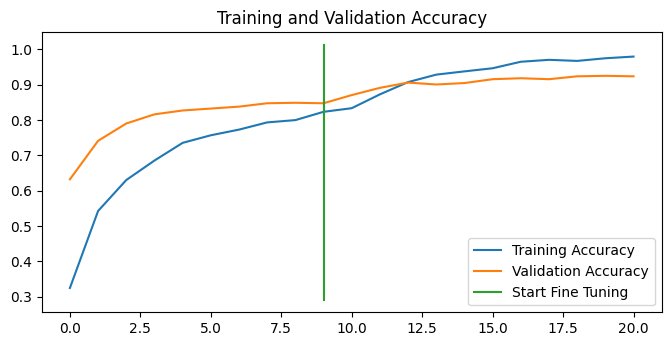

In [10]:
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([EPOCHS-1, EPOCHS-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()